# Description:

Build an ANN model for Drug classification.
This project aims to analyze the relationship between various medical parameters and drug effectiveness.
The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol
levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop
a model that can accurately predict the class or category of a given drug based on its features.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
data=pd.read_csv("drug200.xls")

In [62]:
data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [63]:
data.shape

(200, 6)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [65]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

# Data Pre-processing

Null Values

In [66]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<ipython-input-67-3e58399a0a5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["Drug"], data=data, palette="coolwarm")


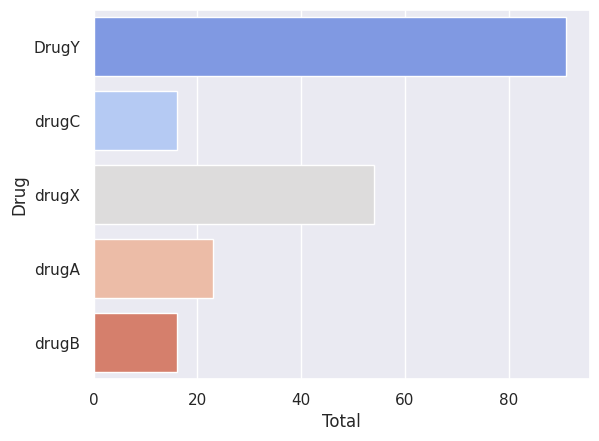

In [67]:
sns.set_theme(style="darkgrid")
sns.countplot(y=data["Drug"], data=data, palette="coolwarm")
plt.ylabel('Drug')
plt.xlabel('Total')
plt.show()

Encoding Categorical Variables

In [68]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [70]:
data['Sex']=le.fit_transform(data['Sex'])
data['BP']=le.fit_transform(data['BP'])
data['Cholesterol']=le.fit_transform(data['Cholesterol'])
data['Drug']=le.fit_transform(data['Drug'])

In [71]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


# Dividing the data into dependent and independent variables

In [72]:
X = data.iloc[:,0:5].values
y = data.iloc[:,5:6].values

In [73]:
y

array([[0],
       [3],
       [3],
       [4],
       [0],
       [4],
       [0],
       [3],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [4],
       [0],
       [4],
       [1],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [4],
       [2],
       [4],
       [0],
       [4],
       [4],
       [1],
       [4],
       [4],
       [4],
       [0],
       [2],
       [0],
       [4],
       [4],
       [4],
       [1],
       [3],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [2],
       [3],
       [2],
       [0],
       [4],
       [0],
       [0],
       [1],
       [0],
       [4],
       [2],
       [0],
       [1],
       [4],
       [0],
       [0],
       [2],
       [0],
       [4],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [4],
       [2],
       [4],
       [3],
    

# Scaling the data

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the data into train and test

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
y_train

array([[4],
       [4],
       [4],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [4],
       [4],
       [0],
       [4],
       [0],
       [4],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [4],
       [0],
       [0],
       [0],
       [0],
       [2],
       [4],
       [4],
       [4],
       [2],
       [1],
       [4],
       [0],
       [4],
       [1],
       [4],
       [3],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [4],
       [0],
       [4],
       [0],
       [0],
       [4],
       [2],
       [4],
       [0],
       [1],
       [3],
       [0],
       [4],
       [4],
       [0],
       [0],
       [4],
       [4],
       [2],
       [0],
       [2],
       [4],
       [0],
       [0],
       [0],
       [2],
       [3],
    

In [77]:
X_train.shape, y_train.shape

((160, 5), (160, 1))

In [78]:
X_test.shape,y_test.shape

((40, 5), (40, 1))

# Building ANN Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model=Sequential()

In [81]:
model.add(Dense(5,activation='relu',kernel_initializer='random_uniform')) # Input layer
model.add(Dense(50,activation='relu',kernel_initializer='random_uniform')) # 1st hidden layer
model.add(Dense(55,activation='relu',kernel_initializer='random_uniform')) # 2nd hidden layer
model.add(Dense(50,activation='relu',kernel_initializer='random_uniform')) # 3rd hidden layer
model.add(Dense(5,activation='softmax',kernel_initializer='random_uniform')) # Output layer

In [82]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(X_train,y_train,batch_size=19,epochs=300)

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 1.6062 - accuracy: 0.4625
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 1.5978 - accuracy: 0.4750
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 1.5842 - accuracy: 0.4750
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 1.5583 - accuracy: 0.4750
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 1.5105 - accuracy: 0.4750
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 1.4253 - accuracy: 0.4750
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 1.3250 - accuracy: 0.4750
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 1.2962 - accuracy: 0.4750
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2699 - accuracy: 0.4750
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4750
Epoch 11/300
9/9 [===========

In [84]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


# Testing the ANN Model

Testing on y_test data

In [85]:
y_test[0]

array([4])

In [86]:
y_pred[0]

array([4.5274214e-06, 0.0000000e+00, 3.7194119e-12, 8.6489262e-04,
       9.9913049e-01], dtype=float32)

In [87]:
np.argmax(y_pred[0])

4

In [88]:
data["Drug"].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [89]:
le.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [90]:
category_mapping = pd.DataFrame(zip(le.classes_, le.transform(le.classes_)))
category_mapping

,0,1
0,DrugY,0
1,drugA,1
2,drugB,2
3,drugC,3
4,drugX,4


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [92]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [93]:
data["Sex"].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

In [94]:
data["BP"].value_counts()

BP
0    77
1    64
2    59
Name: count, dtype: int64

In [95]:
data["Cholesterol"].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

# Testing on new data

In [96]:
pred = model.predict((sc.transform([[47.,  0.,  1.,  0.,  11.567]])))

1/1 [==============================] - 0s 19ms/step


In [97]:
pred

array([[3.1722152e-08, 1.1435177e-23, 2.8776552e-03, 9.9669814e-01,
        4.2419473e-04]], dtype=float32)

In [98]:
np.argmax(pred)

3

In [99]:
category_mapping[0][np.argmax(pred)]

'drugC'

In [102]:
age = float(input("Enter Age: "))
sex = float(input("Enter Sex\n 1 for Male\n 0 for Female - "))
bp = float(input("Enter BP\n 0 for High\n 1 for Low\n 2 for Normal - "))
cholesterol = float(input("Enter Cholesterol\n 0 for High\n 1 for Normal - "))
na2k = float(input("Enter Na_to_K: "))

pred_new = model.predict((sc.transform([[age, sex, bp, cholesterol, na2k]])))

print("Prediction is ", category_mapping[0][np.argmax(pred_new)])

Enter Age: 45
Enter Sex
 1 for Male
 0 for Female - 0
Enter BP
 0 for High
 1 for Low
 2 for Normal - 1
Enter Cholesterol
 0 for High
 1 for Normal - 0
Enter Na_to_K: 56.67
1/1 [==============================] - 0s 19ms/step
Prediction is  DrugY
